In [1]:
import joblib
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data_path = './Human_vital_signs_R.csv'
health_data = pd.read_csv(data_path, index_col=[0])

# Verify column names
print("Training Data Columns:", health_data.columns)

C:\Users\asus\AppData\Local\Temp\ipykernel_20424\1770838163.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Training Data Columns: Index(['Time (s)', ' HR (BPM)', ' RESP (BPM)', ' SpO2 (%)', 'TEMP (*C)',
       'OUTPUT'],
      dtype='object')


In [2]:

# Drop the 'RESP (BPM)' and 'Time (s)' column
health_data = health_data.drop(columns=[' RESP (BPM)'])
health_data = health_data.drop(columns=['Time (s)'])
print("Training Data Columns:", health_data.columns)

Training Data Columns: Index([' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)', 'OUTPUT'], dtype='object')


In [3]:

# Define the target and features
y = health_data['OUTPUT']
X = health_data.drop(['OUTPUT'], axis=1)



In [4]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)



In [5]:
# Create a pipeline for imputation and model training
my_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('model', RandomForestClassifier(n_estimators=500, max_depth=7))
])

# Perform cross-validation
cv_scores = cross_val_score(my_pipeline, X, y, cv=3, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())


Cross-validation scores: [0.94422217 0.9767004  0.92832765]
Mean cross-validation score: 0.949750071689223


In [6]:

# Train the model on the entire training set
my_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = my_pipeline.predict(X_test)

# Enregistrer le modèle
joblib.dump(my_pipeline, 'model.pkl')
print(f"Model saved")

Model saved


In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy score on the test set:', accuracy)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy score on the test set: 0.9915669739164542
Confusion Matrix:
[[3896   21]
 [  22 1160]]
Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.99      0.99      0.99      3917
      Normal       0.98      0.98      0.98      1182

    accuracy                           0.99      5099
   macro avg       0.99      0.99      0.99      5099
weighted avg       0.99      0.99      0.99      5099



<Figure size 1000x700 with 0 Axes>

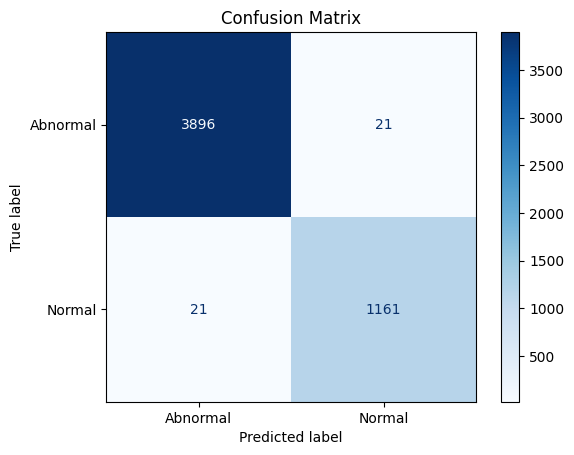

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Abnormal', 'Normal'])

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [7]:

# Load the new data for testing
new_data_path = 'C:/Users/octanet/Desktop/PFE/smartwatchModel/feeds1.csv'
new_data = pd.read_csv(new_data_path)

# Verify and rename columns to match training data
new_data = new_data.rename(columns={
    'field1': 'TEMP (*C)',
    'field2': ' HR (BPM)',
    'field3': ' SpO2 (%)',
    'status': 'OUTPUT',
})
# Verify column names
print("Training Data Columns:", new_data.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/octanet/Desktop/PFE/smartwatchModel/feeds1.csv'

In [8]:

# Select relevant columns for prediction
X_new = new_data[[' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)']]

# Preprocess the new data using the same pipeline
X_new_imputed = pd.DataFrame(my_pipeline.named_steps['imputer'].transform(X_new), columns=X_new.columns)


NameError: name 'new_data' is not defined

In [12]:

# Make predictions
predictions = my_pipeline.named_steps['model'].predict(X_new_imputed)

# Add predictions to the original data
new_data['Predictions'] = predictions

# Display the predictions
print(new_data[[ ' HR (BPM)', ' SpO2 (%)', 'TEMP (*C)', 'Predictions']])

    HR (BPM)   SpO2 (%)  TEMP (*C) Predictions
0         90         80       37.0    Abnormal
1         60        100       38.0    Abnormal
2         90         70       38.0    Abnormal
3        100         60       38.0    Abnormal
4         90        100       36.5    Abnormal
5         94         97       36.5      Normal
6         80         95       37.0    Abnormal
7         94        995       36.0    Abnormal
8         94         95       36.0    Abnormal


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
